# **Lab 9.2 Denoise & Deblur image with  UNet**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader,Subset
from torch.utils.tensorboard import SummaryWriter

import numpy as np
import cv2
import os
import random
from skimage.util import random_noise
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from tqdm import tqdm
import matplotlib.pyplot as plt
import os


## Data Preparation
Complete the class `CustomImageDataset()` that `__getitem__` return ***noisy blury*** image and ***ground truth*** image.
Please ensure that the final image is in RGBscale and has a size of 128x128.

In [ ]:
### START CODE HERE ###
class CustomImageDataset(Dataset):
    def __init__(self):
        pass

    def __getitem__(self, idx):
        pass
### END CODE HERE ###

Use your `CustomImageDataset()`  to load the dataset in the cell below. Then, display the image from the first batch.

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

- Noisy blury images (this reference use salt and pepper noise)<br>
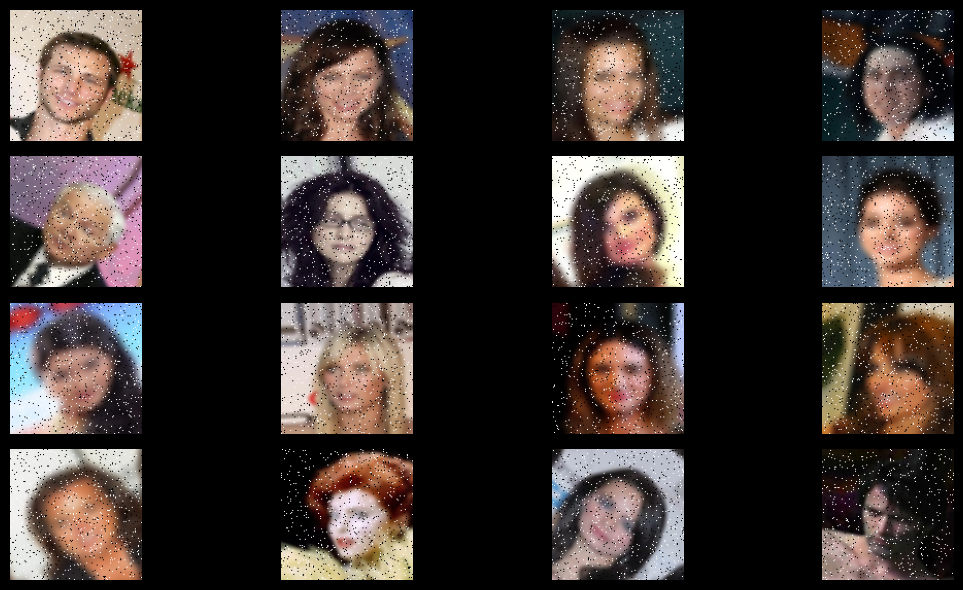

- Ground Truth images<br>
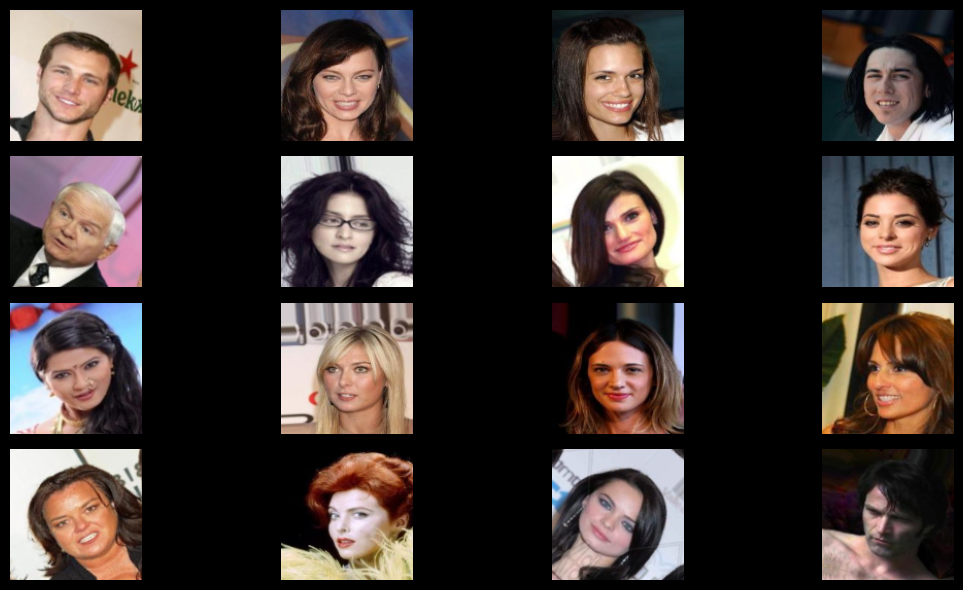

</details>

In [ ]:
### START CODE HERE ###


### END CODE HERE ###

## Create U-Net model

Create a U-Net based on the reference image or another U-Net implementation source. The U-Net class should be able to select between Convolution Transpose and Upsample in the upsampling part through the constructor.

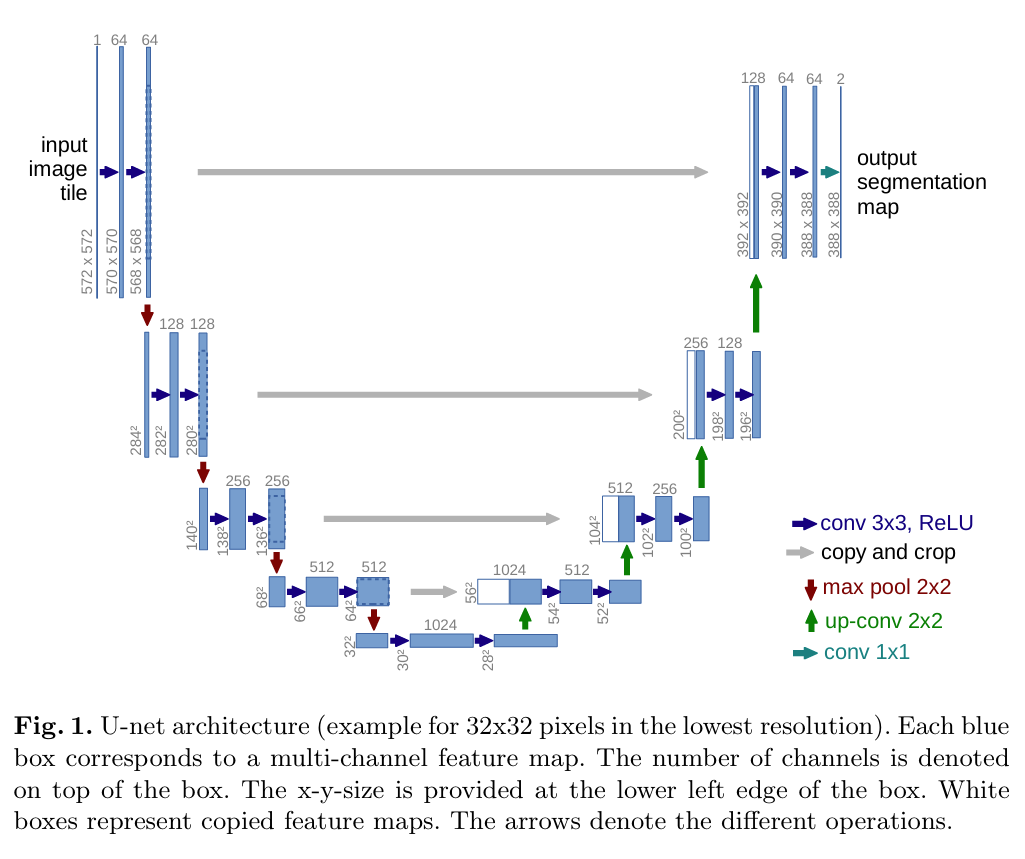


In [ ]:
### START CODE HERE ###

class UNet(nn.Module):
    def __init__(self , bilinear=False):
        super(UNet, self).__init__()
        pass

    def forward(self, x):
        pass
### END CODE HERE ###

Complete the `train()` function in the cell below. This function should evaluate the model at every epoch, log the ***training loss, test loss,test PSNR, test SSIM, and histogram of local gradient of all trainable parameter from all layers of the model at every $N$ iterations*** on TensorBoard. Additionally, it should save the model at the last epoch.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

- Histogram of local gradient
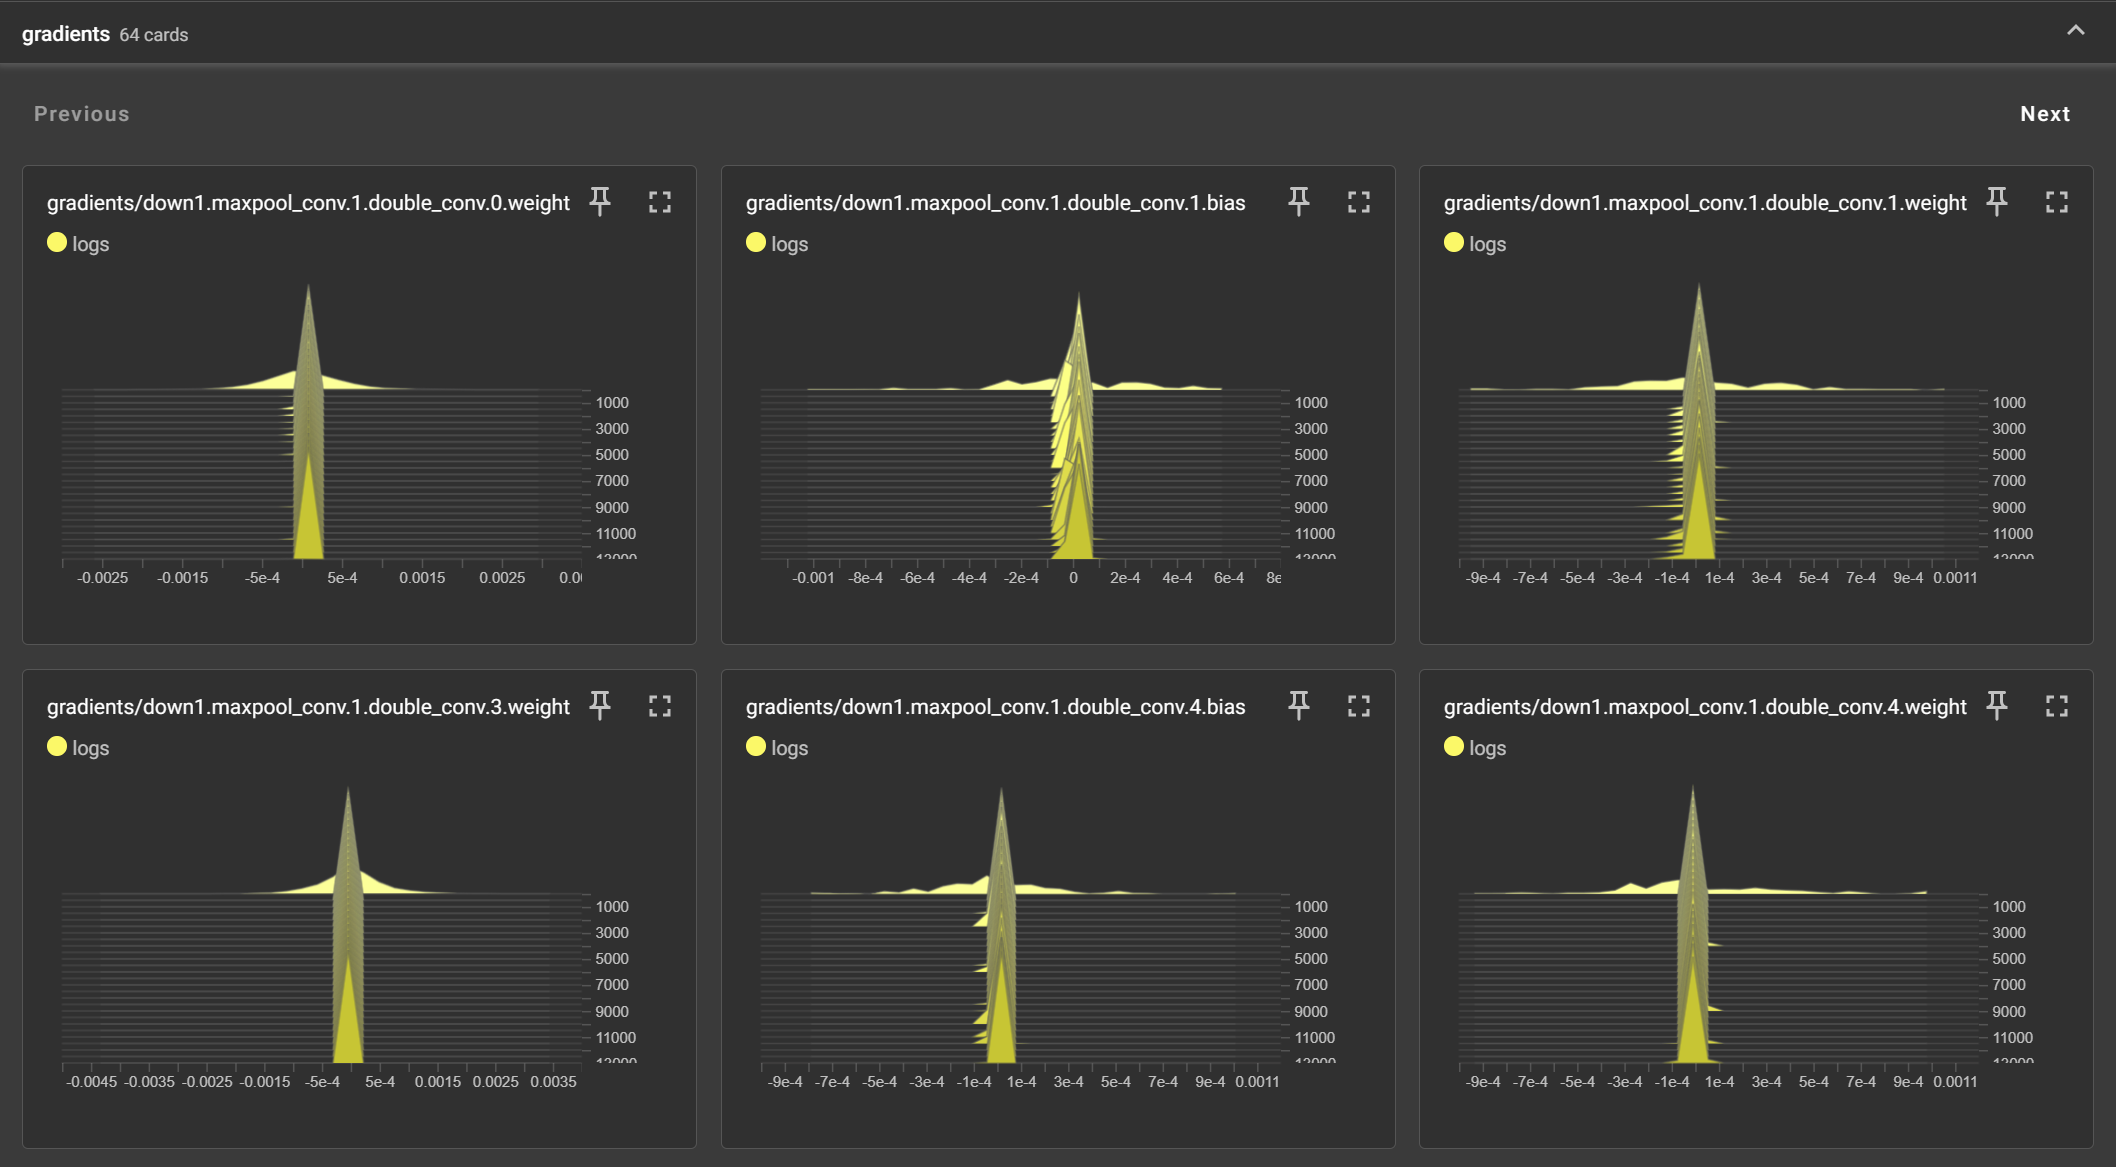

</details>

Resource : [PyTorch Training loop](<https://pytorch.org/tutorials/beginner/introyt/trainingyt.html#:~:text=%3D0.9)-,The%20Training%20Loop,-Below%2C%20we%20have>), [TensorBoard](https://pytorch.org/docs/stable/tensorboard.html), [PSNR & SSIM](https://ieeexplore.ieee.org/document/5596999)

In [ ]:
### START CODE HERE ###
def train():
    pass

### END CODE HERE ###

Let's train your model. You will have to perform training twice: once for the upsampling part that uses the `upsample block`, and once for the upsampling part that uses `Convolution Transpose`.

In [ ]:
### START CODE HERE ###


train(None)

### END CODE HERE ###

Let's use your model.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

- Input images<br>
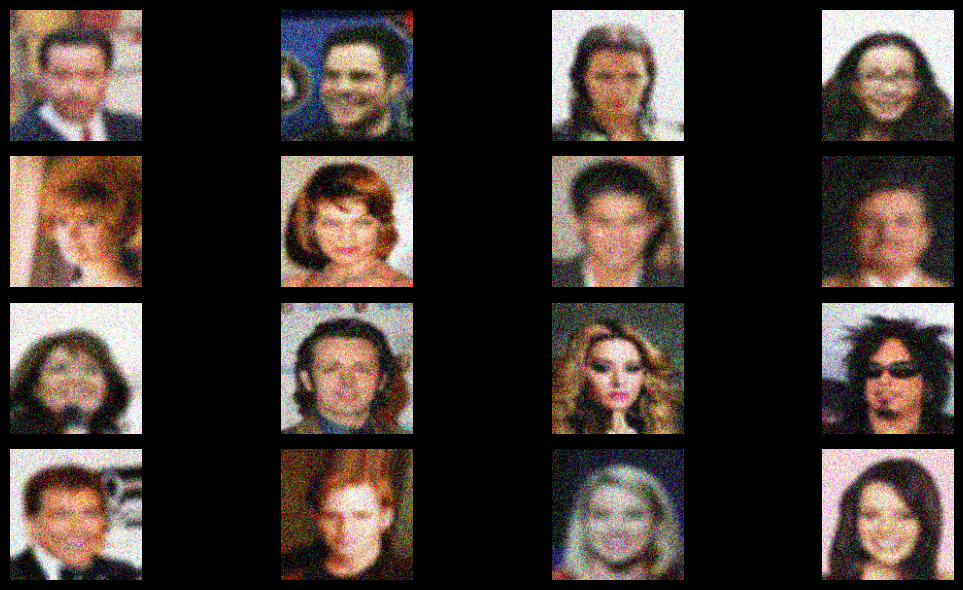

- Output images<br>
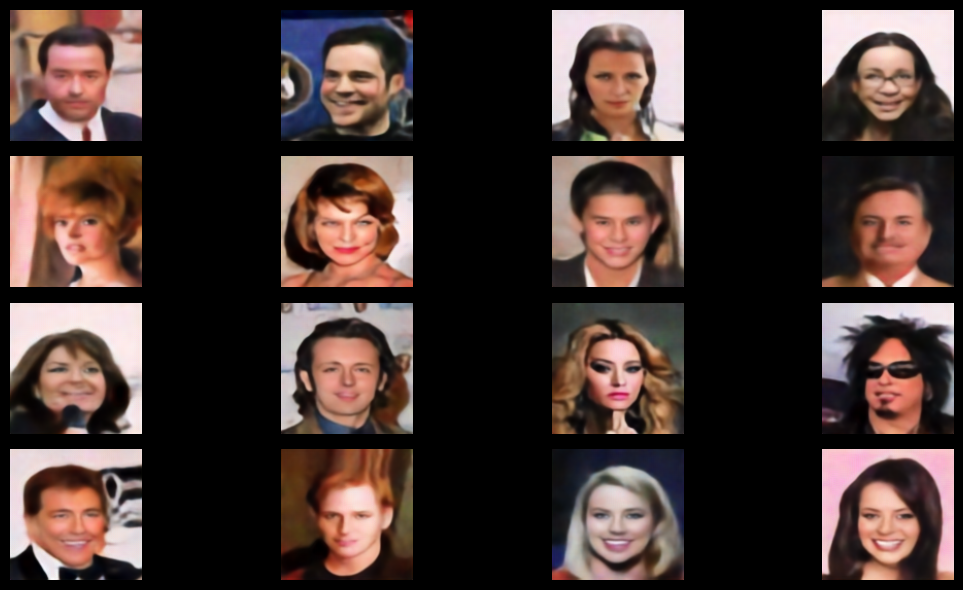

- Ground Truth images<br>
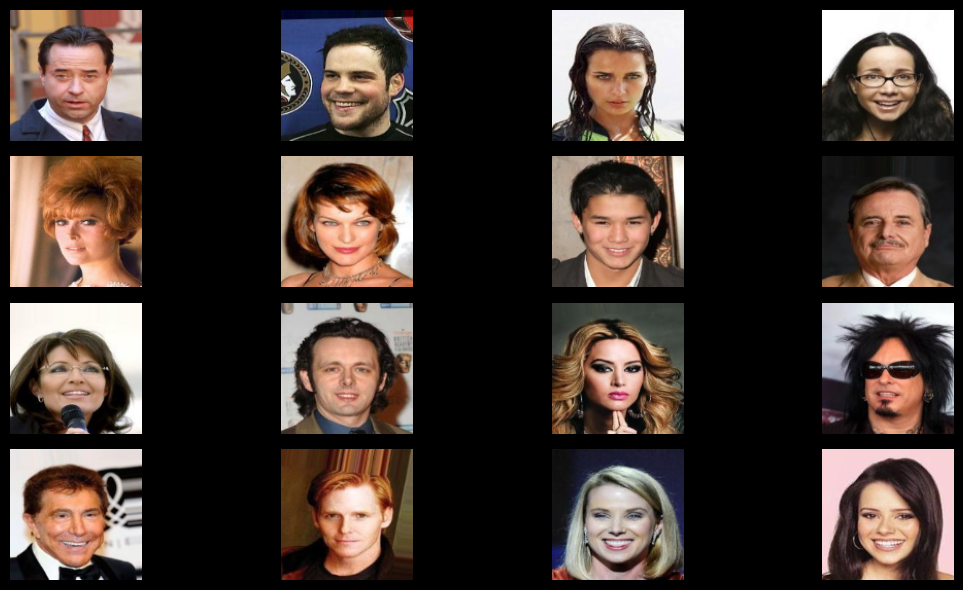

</details>

In [ ]:
### START CODE HERE ###




### END CODE HERE ###

Use the `FeatureExtractor()` class and `visualize_feature_map()` function to visualize the feature map of ***ALL*** layers or block of your model. Then, save it as an image.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

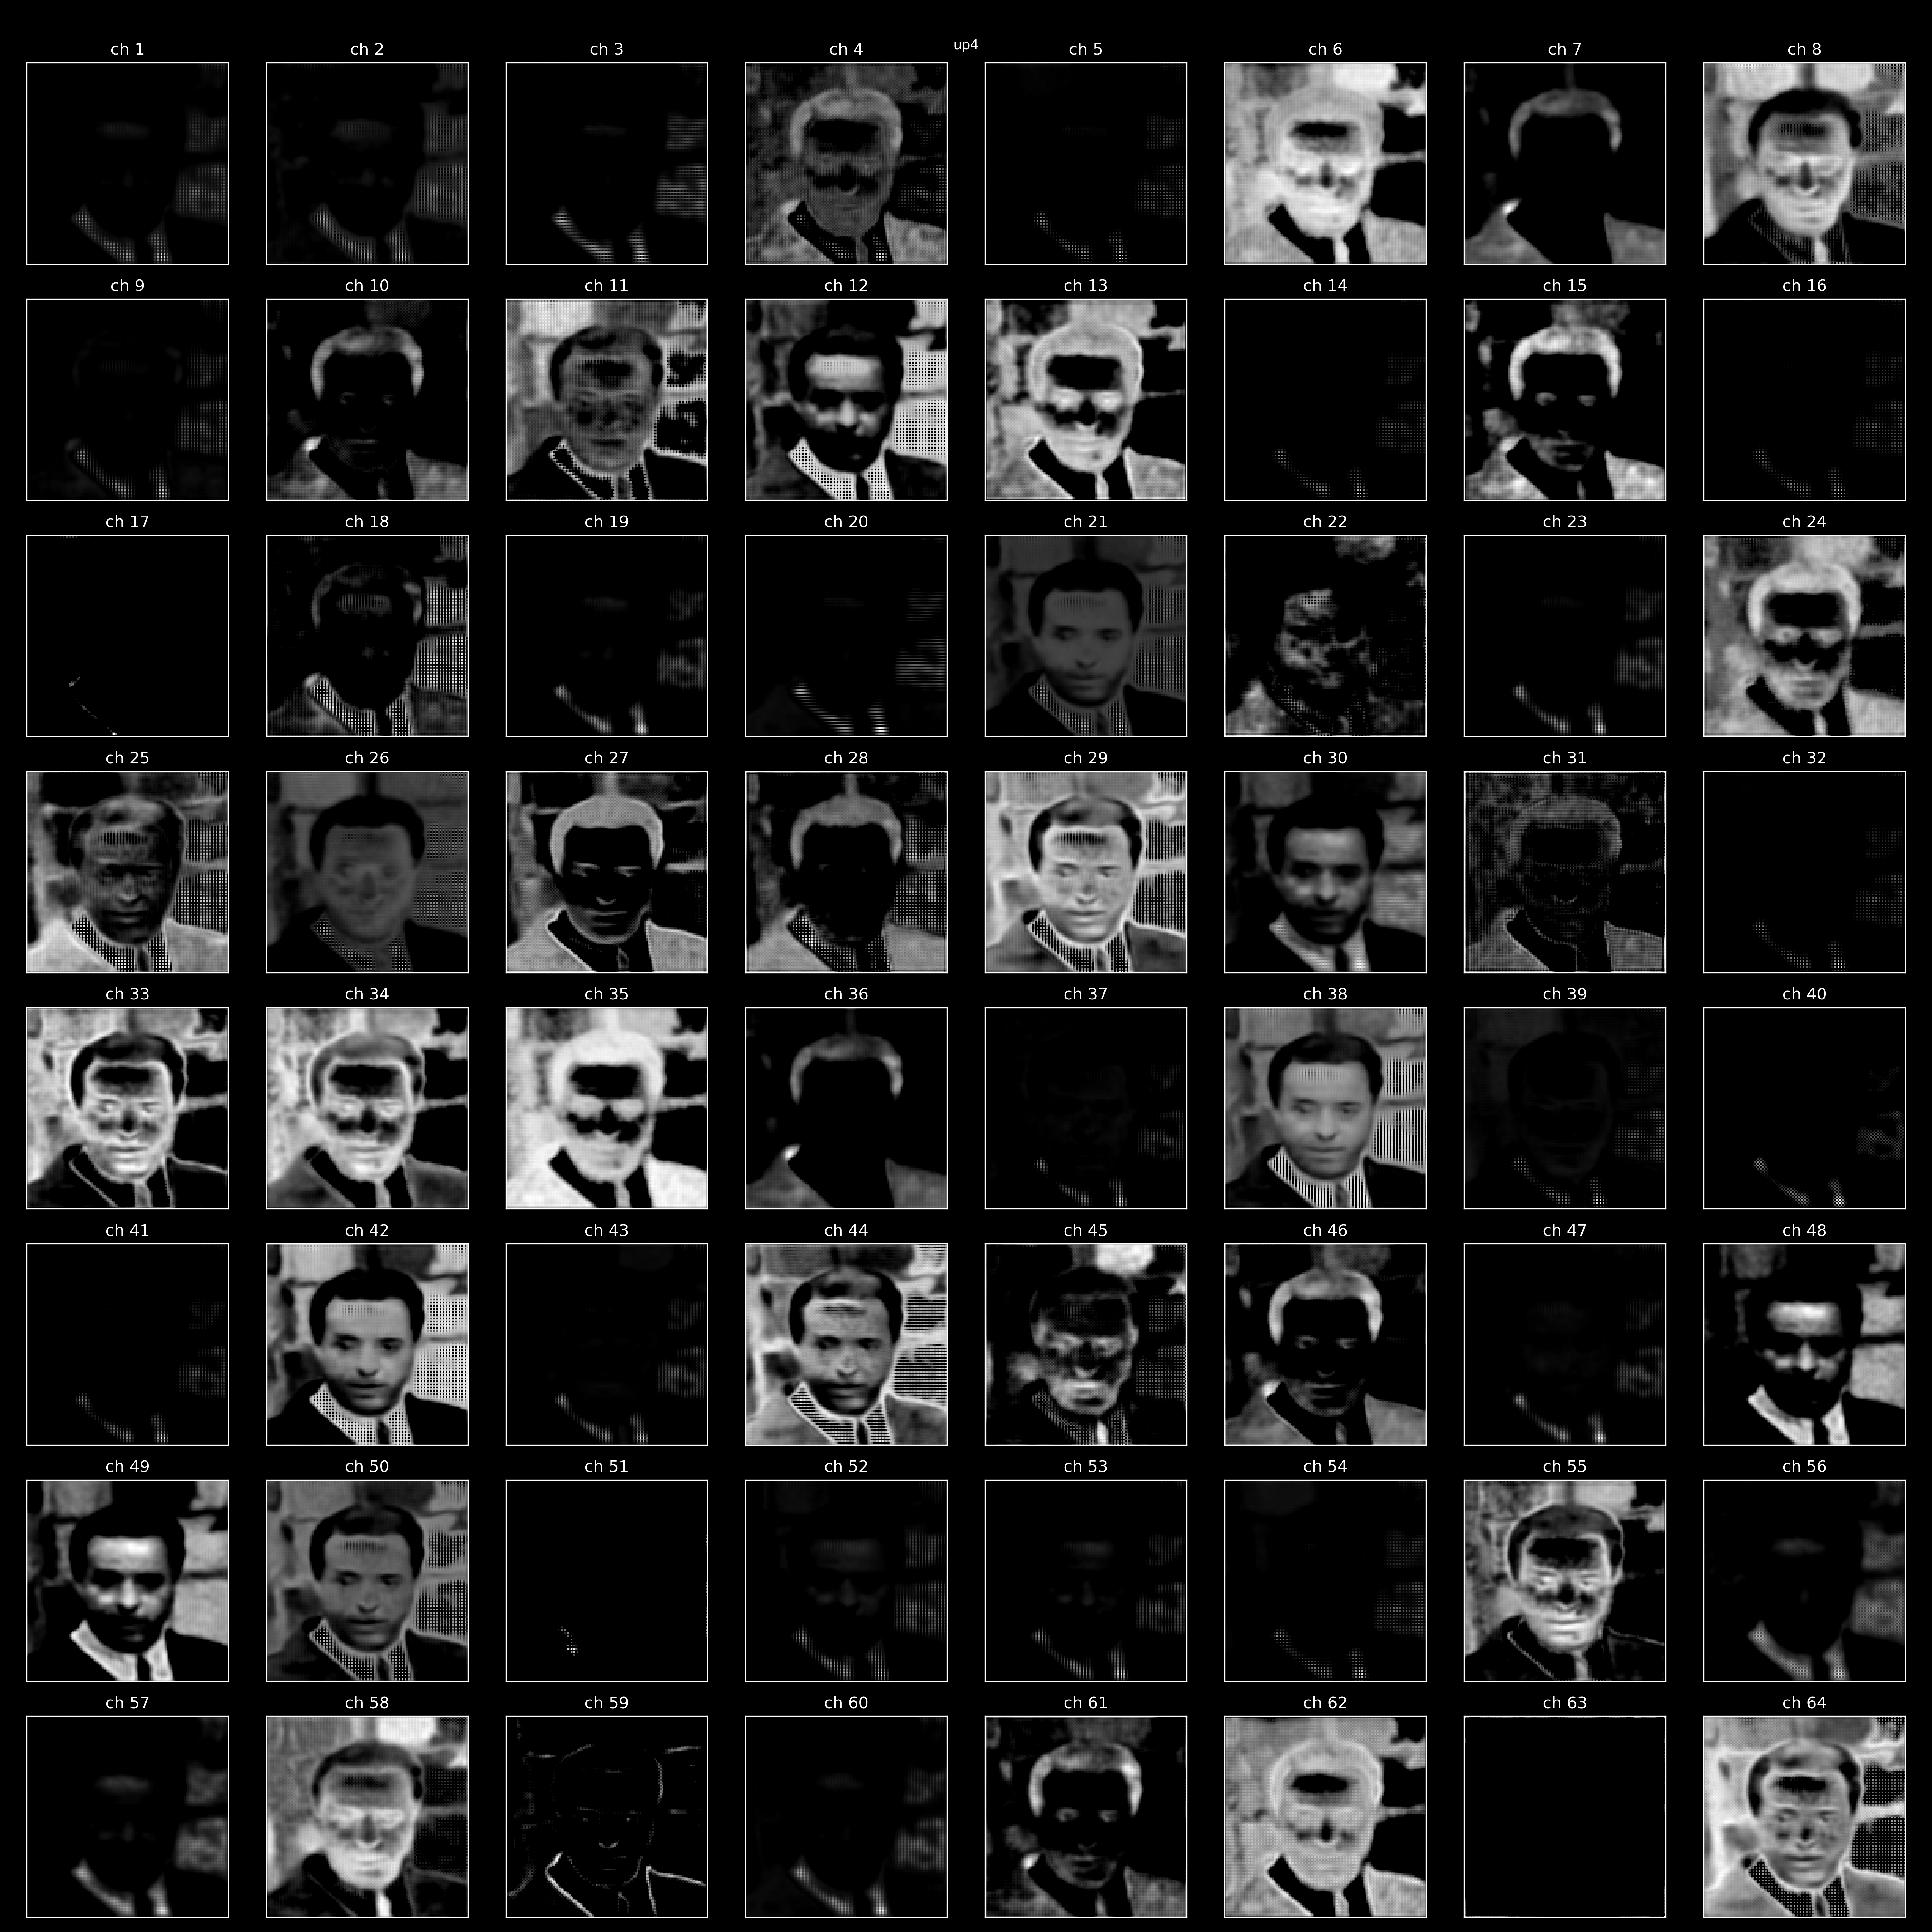

</details>

In [ ]:
class FeatureExtractor(nn.Module):
    def __init__(self, model, target_layers):
        super(FeatureExtractor, self).__init__()
        self.model = model
        self.target_layers = target_layers
        self.features = []  # List to store feature maps

        # Register hooks for target layers
        for layer_name, layer in self.model.named_modules():
            if layer_name in target_layers:
                print(layer_name)
                layer.register_forward_hook(self.save_feature(layer_name))

    def save_feature(self, layer_name):
        def hook(module, input, output):
            self.features.append(output.clone())
        return hook

    def forward(self, x):
        self.features = []  
        self.model(x)  
        return self.features  

In [ ]:
def visualize_feature_map(x,base_filename):
    ### START CODE HERE ###




    plt.savefig(None)
    plt.close()
    print(f"Saved as {None}")
    ### END CODE HERE ###

In [ ]:
### START CODE HERE ###


### END CODE HERE ###

Questions:
1. In original paper of U-Net, the author implemented the center crop technique in skip connection layer. How do you solve the difference dimension between encoder activation and decoder activation in skip connection layer? Explain the effect that might be on each upsampling block of the decoder. (See feature map of the first convolution layer of the upsampling block especially the last decoding layer)
2. Suggest other techniques (at least 2) that can be used to solve the difference dimension when concatenating encoder activation to the decoder activation.
3. What would be the effect of each suggested technique in previous question? 
